### Задание

#### 1. Получите данные и загрузите их в рабочую среду.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, StackingClassifier

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### 2. Подготовьте датасет к обучению моделей.

##### a) Категориальные переменные переведите в цифровые значения.

In [3]:
le = LabelEncoder()

In [4]:
le.fit(df['Sex'])

LabelEncoder()

In [5]:
df['Sex'] = le.transform(df['Sex'])

In [6]:
le.fit(df['ExerciseAngina'])

LabelEncoder()

In [7]:
df['ExerciseAngina'] = le.transform(df['ExerciseAngina'])

In [8]:
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

In [9]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1


##### b) Постройте 1-2 графика на выбор.

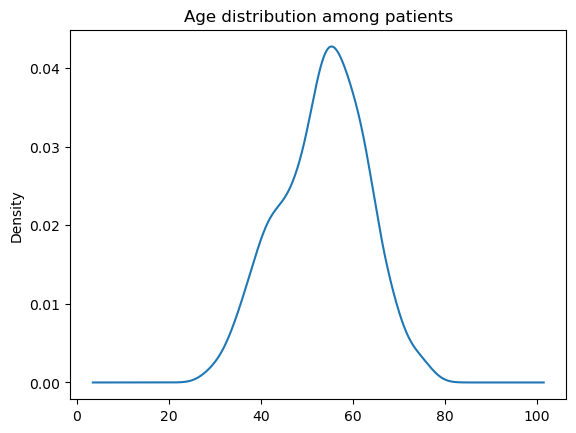

In [10]:
# Визуализируем распределение по возрасту среди пациентов
df['Age'].plot(kind='density')
plt.title('Age distribution among patients')
plt.show()

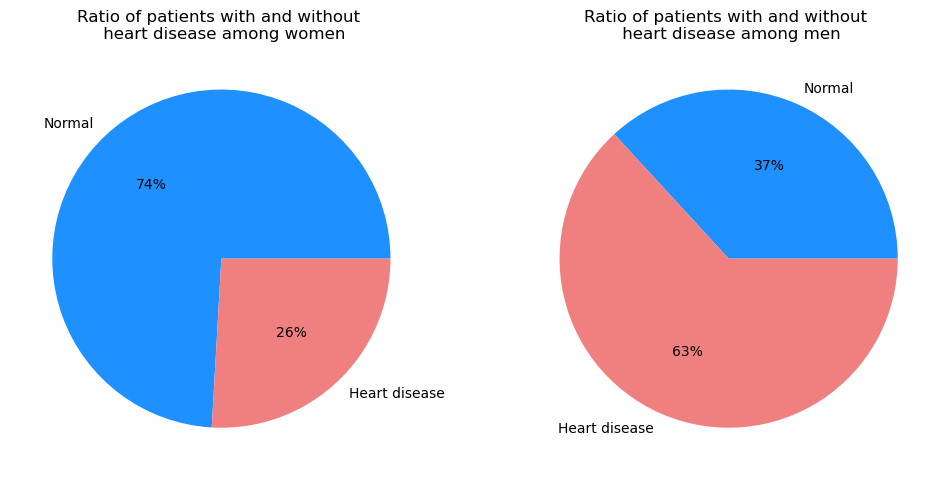

In [11]:
# Визуализируем разницу в соотношении больных и здоровых пациентов среди мужчин и женщин
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie([len(df['Sex'][(df['Sex'] == 0) & (df['HeartDisease'] == 0)]), 
        len(df['Sex'][(df['Sex'] == 0) & (df['HeartDisease'] == 1)])], 
        labels=['Normal', 'Heart disease'], autopct='%1.0f%%', colors=['dodgerblue', 'lightcoral'])
plt.title('Ratio of patients with and without \n heart disease among women')

plt.subplot(122)
plt.pie([len(df['Sex'][(df['Sex'] == 1) & (df['HeartDisease'] == 0)]), 
        len(df['Sex'][(df['Sex'] == 1) & (df['HeartDisease'] == 1)])], 
        labels=['Normal', 'Heart disease'], autopct='%1.0f%%', colors=['dodgerblue', 'lightcoral'])
plt.title('Ratio of patients with and without \n heart disease among men')
plt.show()

#### 3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease', axis=1),
                                                    df['HeartDisease'],
                                                    test_size=0.2,
                                                    random_state=42)

In [13]:
X_train.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
795,42,1,120,240,1,194,0,0.8,0,0,1,0,0,1,0,1,0,0
25,36,1,130,209,0,178,0,0.0,0,0,1,0,0,1,0,0,0,1
84,56,1,150,213,1,125,1,1.0,1,0,0,0,0,1,0,0,1,0
10,37,0,130,211,0,142,0,0.0,0,0,1,0,0,1,0,0,0,1
344,51,1,120,0,1,104,0,0.0,1,0,0,0,0,1,0,0,1,0


In [14]:
y_train.head()

795    0
25     0
84     1
10     0
344    1
Name: HeartDisease, dtype: int64

#### 4. Обучите дерево решений на обучающем множестве.

##### a) Используйте модель `tree.DecisionTreeClassifier`

In [15]:
tree_model = DecisionTreeClassifier(random_state=42)

In [16]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

##### b) Используйте модель `ensemble.RandomForestClassifier`

In [17]:
random_forest_model = RandomForestClassifier(random_state=42)

In [18]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### 5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью `metrics.classification_report`.

In [19]:
y_test_pred_tree = tree_model.predict(X_test)

In [20]:
y_test_pred_forest = random_forest_model.predict(X_test)

In [21]:
tree_metrics = pd.DataFrame(classification_report(y_test, y_test_pred_tree, output_dict=True))
tree_metrics

,0,1,accuracy,macro avg,weighted avg
precision,0.738636,0.875000,0.809783,0.806818,0.817935
recall,0.844156,0.785047,0.809783,0.814601,0.809783
f1-score,0.787879,0.827586,0.809783,0.807732,0.810970
support,77.000000,107.000000,0.809783,184.000000,184.000000


In [22]:
tree_metrics = classification_report(y_test, y_test_pred_tree, target_names=['Normal', 'Heart disease'])
print(tree_metrics)

               precision    recall  f1-score   support

       Normal       0.74      0.84      0.79        77
Heart disease       0.88      0.79      0.83       107

     accuracy                           0.81       184
    macro avg       0.81      0.81      0.81       184
 weighted avg       0.82      0.81      0.81       184



In [23]:
forest_metrics = pd.DataFrame(classification_report(y_test, y_test_pred_forest, output_dict=True))
forest_metrics

,0,1,accuracy,macro avg,weighted avg
precision,0.839506,0.912621,0.880435,0.876064,0.882024
recall,0.883117,0.878505,0.880435,0.880811,0.880435
f1-score,0.860759,0.895238,0.880435,0.877999,0.880810
support,77.000000,107.000000,0.880435,184.000000,184.000000


In [24]:
forest_metrics = classification_report(y_test, y_test_pred_forest, target_names=['Normal', 'Heart disease'])
print(forest_metrics)

               precision    recall  f1-score   support

       Normal       0.84      0.88      0.86        77
Heart disease       0.91      0.88      0.90       107

     accuracy                           0.88       184
    macro avg       0.88      0.88      0.88       184
 weighted avg       0.88      0.88      0.88       184



#### 6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.

In [25]:
important_features = pd.Series(random_forest_model.feature_importances_).sort_values(ascending=False)

In [26]:
important_features.index = pd.Series(X_train.columns)

In [27]:
important_features

Age                  0.178506
Sex                  0.107912
RestingBP            0.099593
Cholesterol          0.097981
FastingBS            0.087965
MaxHR                0.087015
ExerciseAngina       0.080296
Oldpeak              0.064463
ChestPainType_ASY    0.063416
ChestPainType_ATA    0.038490
ChestPainType_NAP    0.019292
ChestPainType_TA     0.014570
RestingECG_LVH       0.014349
RestingECG_Normal    0.012275
RestingECG_ST        0.011108
ST_Slope_Down        0.009131
ST_Slope_Flat        0.007308
ST_Slope_Up          0.006330
dtype: float64

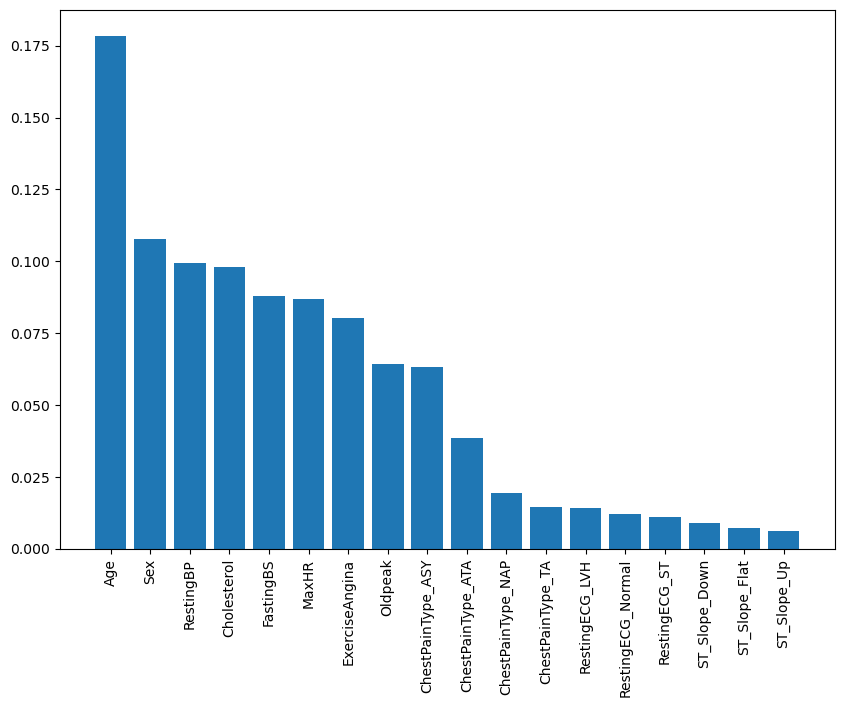

In [28]:
plt.figure(figsize=(10, 7))
plt.bar(important_features.index, important_features)
plt.xticks(rotation=90)
plt.show()

#### 7. Обучите бэггинг над моделью из п. 4a. Используйте `ensemble.BaggingClassifier`.

In [29]:
bagging = BaggingClassifier(tree_model, random_state=42)

In [30]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

##### a) Повторите п. 5

In [31]:
y_test_pred_bagging = bagging.predict(X_test)

In [32]:
bagging_metrics = classification_report(y_test, y_test_pred_bagging, target_names=['Normal', 'Heart disease'])
print(bagging_metrics)

               precision    recall  f1-score   support

       Normal       0.80      0.91      0.85        77
Heart disease       0.93      0.83      0.88       107

     accuracy                           0.86       184
    macro avg       0.86      0.87      0.86       184
 weighted avg       0.87      0.86      0.86       184



#### 8. Обучите стекинг трех моделей: из п. 4a, п. 4b и `svm.LinearSVC`. Используйте `ensemble.StackingClassifier`.

In [33]:
stacking = StackingClassifier(
    [
        ('Tree', tree_model),
        ('Random forest', random_forest_model),
        ('Linear Support Vector Classification', LinearSVC(dual=False))
    ], RidgeClassifierCV())

In [34]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('Tree',
                                DecisionTreeClassifier(random_state=42)),
                               ('Random forest',
                                RandomForestClassifier(random_state=42)),
                               ('Linear Support Vector Classification',
                                LinearSVC(dual=False))],
                   final_estimator=RidgeClassifierCV())

##### a) Повторите п. 5

In [35]:
y_test_pred_stacking = stacking.predict(X_test)

In [36]:
stacking_metrics = classification_report(y_test, y_test_pred_stacking, target_names=['Normal', 'Heart disease'])
print(stacking_metrics)

               precision    recall  f1-score   support

       Normal       0.85      0.87      0.86        77
Heart disease       0.90      0.89      0.90       107

     accuracy                           0.88       184
    macro avg       0.88      0.88      0.88       184
 weighted avg       0.88      0.88      0.88       184



#### 9. Сформулируйте выводы по проделанной работе.

Метрики показывают, что все модели, использующие ансамблевые методы, имеют преимущество в качестве своих предсказаний. Среди таких моделей метрики оказались достаточно близкими и однозначно выбрать лучшую модель сложно. Сделать это можно будет, исходя из конкретных требований, предъявляемых к результату.  
Назову наилучшей моделью, на мой взгляд, случайный лес, так как он показывает хорошую точность и полноту, а также имеет возможность оценить важность признаков.